# Image classification using ResNet50

This notebook illustrates how to perform image classification using ResNet50 and demonstrate adversarial examples.


In [1]:
# Import the model
import tensorflow as tf
import keras
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.preprocessing import image as image
from keras.preprocessing.image import img_to_array


# NumPy for manipulating images as multi-dimensional arrays
import numpy as np
# PyPlot for plotting
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
model = ResNet50(weights='imagenet')

In [3]:
def get_bar_chart(img, predictions):
    
    transpose_predictions = np.transpose(predictions)
    classifications = transpose_predictions[1]
    # values = np.around((transpose_predictions[2] * 100), decimals=2)
    values = transpose_predictions[2].astype(np.float)
    print('Predictions: ', predictions)
    #fig, ax = plt.subplots()
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=5, hspace=None)
    ax1.imshow(img)

    #plt.figure()
    y_pos = np.arange(len(classifications))
    ax2.barh(y_pos, values, align='center')
    ax2.set_xlabel('Prediction')
    ax2.set_yticks(y_pos)
    ax2.set_yticklabels(classifications)
    ax2.invert_yaxis()
    #plt.xlim(0, 1.0)
    plt.tight_layout()
    # redraw the canvas
    # fig.canvas.draw()
    # convert canvas to image
    #chart = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8,
    #                    sep='')
    # return chart.reshape(fig.canvas.get_width_height()[::-1] + (3,))
 

## Load an image and show predictions

Predictions:  [('n01882714', 'koala', 0.9999845), ('n02500267', 'indri', 7.161558e-06), ('n01883070', 'wombat', 3.9482834e-06), ('n02497673', 'Madagascar_cat', 1.1228478e-06), ('n02125311', 'cougar', 1.0844948e-06)]


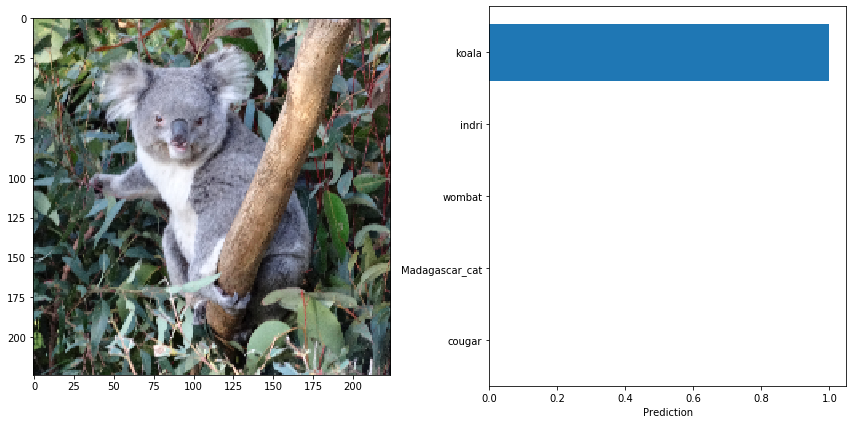

In [22]:
# Get a new image
image_path = 'images/koala.jpg'
# image_path = 'images/koala_with_ball.png'
# image_path = 'images/koala_with_ball_adv_1.png'
# Prepare image for passing to ResNet50
img = keras.preprocessing.image.load_img(image_path, target_size = [224, 224])
img_np = keras.preprocessing.image.img_to_array(img)
image_np_exp = np.expand_dims(img_np, axis=0)
image_for_resnet = preprocess_input(image_np_exp) 

predictions = decode_predictions(model.predict(image_for_resnet), top=5)[0]
get_bar_chart(img, predictions)